In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
filetoload1 = "Resources/city_data.csv"
filetoload2 = "Resources/ride_data.csv"

city_df = pd.read_csv(filetoload1)
ride_df = pd.read_csv(filetoload2)
city_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [14]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
pyber_data_df = ride_df.merge(city_df,on="city", how="left")
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [20]:
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [23]:
# Get the number of rides for urban, suburban and rural cities.
urban_ride_ct = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_ct = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_ct = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [24]:
# Get the average fares for urban, suburban and rural cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [25]:
# Get the average number of drivers for urban, suburban and rural cities.
urban_driver_ct = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_ct = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_ct = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_ct 


city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

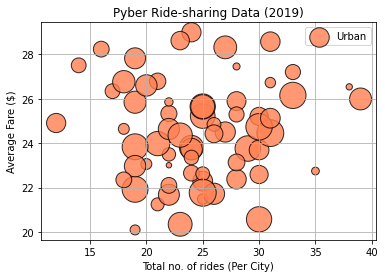

In [30]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_ct,urban_avg_fare,s=10*urban_driver_ct,
           c="coral", edgecolor="black",
           linewidths = 1,
           alpha=0.8,label="Urban")
plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

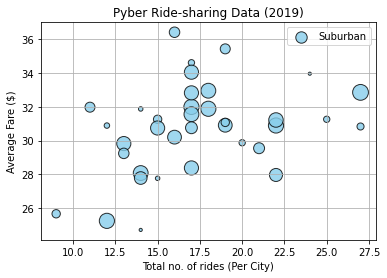

In [35]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_ct, suburban_avg_fare, 
            s = 10 * suburban_driver_ct,
           c="skyblue", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Suburban")

plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

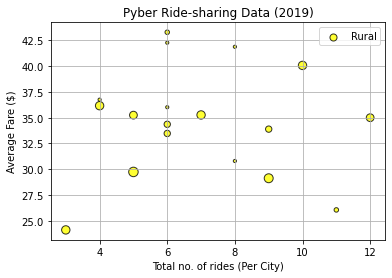

In [37]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_ct, rural_avg_fare, 
            s = 10 * rural_driver_ct,
           c="yellow", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Rural")

plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

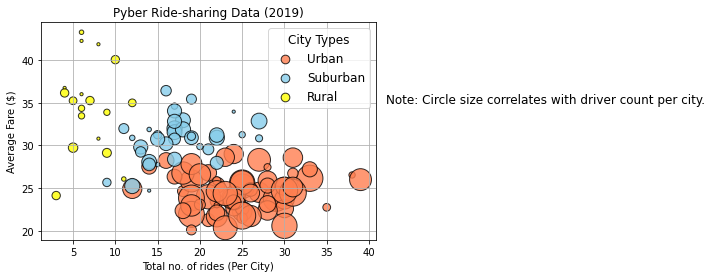

In [42]:
#combine all 3 charts
plt.scatter(urban_ride_ct,urban_avg_fare,s=10*urban_driver_ct,
           c="coral", edgecolor="black",
           linewidths = 1,
           alpha=0.8,label="Urban")

plt.scatter(suburban_ride_ct, suburban_avg_fare, 
            s = 10 * suburban_driver_ct,
           c="skyblue", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Suburban")

plt.scatter(rural_ride_ct, rural_avg_fare, 
            s = 10 * rural_driver_ct,
           c="yellow", edgecolor = "black",
           linewidths = 1,
           alpha=0.8,label = "Rural")
plt.title("Pyber Ride-sharing Data (2019)")
plt.xlabel("Total no. of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend

lgnd=plt.legend(fontsize="12", mode= "Expanded",
               scatterpoints=1, loc = "best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
